In [21]:
from src.Evolution import breed_population,evolve_knapsack_population
from src.KnapsackIndividual import KnapsackIndividual,KnapsackItem
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.colors import LogNorm
import matplotlib.pyplot as plt
import numpy as np

In [2]:
items = list(set([(np.random.randint(1,10),np.random.randint(1,10)) for x in range(30)])) # item = (weight,value)
def total_value(items, max_weight):
    return  sum([x[1] for x in items]) if sum([x[0] for x in items]) <= max_weight else 0
cache = {}
def solve(items, max_weight):
    if not items:
        return ()
    if (items,max_weight) not in cache:
        head = items[0]
        tail = items[1:]
        include = (head,) + solve(tail, max_weight - head[0])
        dont_include = solve(tail, max_weight)
        if total_value(include, max_weight) > total_value(dont_include, max_weight):
            answer = include
        else:
            answer = dont_include
        cache[(items,max_weight)] = answer
    return cache[(items,max_weight)] 

In [3]:
max_weight = 100
solution = solve(tuple(items), max_weight)

In [4]:
np.sum([x[0] for x in list(solution)])

100

In [5]:
np.sum([x[1] for x in list(solution)])

136

In [6]:
items_ = [KnapsackItem(x[0], x[1]) for x in items]
individuals = [KnapsackIndividual(items_, max_weight=100) for x in range(5)]
g,mev,w,v,f,mf,pop,bog,matings,pop_record = evolve_knapsack_population(individuals,0.25,10,20,0.2)

Generation 0
60.0% Population Legal
Mean Fitness: 99927.6480519298
Best Value: 113
Most Fit:
   value: 113 weight: 99 fitness: 131772.9273509011
Generation 1
100.0% Population Legal
Mean Fitness: 135486.44060413737
Best Value: 117
Most Fit:
   value: 117 weight: 93 fitness: 150475.9068072414
Generation 2
100.0% Population Legal
Mean Fitness: 135486.44060413737
Best Value: 117
Most Fit:
   value: 117 weight: 93 fitness: 150475.9068072414
Generation 3
100.0% Population Legal
Mean Fitness: 136404.40097235082
Best Value: 117
Most Fit:
   value: 117 weight: 93 fitness: 150475.9068072414
Generation 4
100.0% Population Legal
Mean Fitness: 176320.3115539036
Best Value: 129
Most Fit:
   value: 129 weight: 99 fitness: 196046.90677295643
Generation 5
100.0% Population Legal
Mean Fitness: 180853.02969634815
Best Value: 129
Most Fit:
   value: 129 weight: 99 fitness: 196046.90677295643
Generation 6
100.0% Population Legal
Mean Fitness: 180853.02969634815
Best Value: 129
Most Fit:
   value: 129 weig

In [7]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
%matplotlib inline

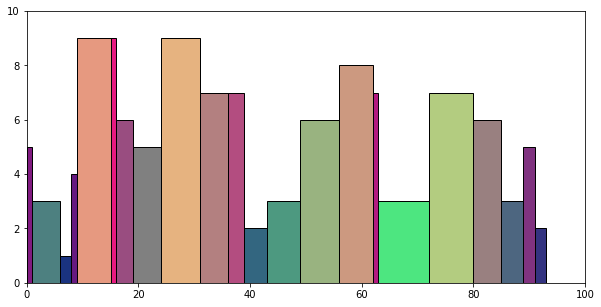

In [8]:
t = bog[2]

f = plt.figure(figsize=(10,5))
ax = f.add_subplot(111)
def draw_knapsack(t,ax):
    xs = 0
    for s in t.items:
        ax.add_patch(patches.Rectangle((xs,0),s.weight,s.value,edgecolor="black",facecolor=(s.value/10,s.weight/10, 0.5)))
        xs+=s.weight
    plt.xlim(0,100)
    plt.ylim(0,10)
    
draw_knapsack(t,ax)

In [9]:
t = KnapsackIndividual(item_pool=items_,max_weight=100)
t.items = [KnapsackItem(x[0], x[1]) for x in list(solution)]

In [10]:
solution

((6, 9),
 (5, 6),
 (7, 7),
 (3, 7),
 (2, 5),
 (8, 5),
 (5, 5),
 (2, 9),
 (7, 6),
 (1, 5),
 (3, 6),
 (2, 2),
 (1, 4),
 (7, 5),
 (1, 9),
 (8, 7),
 (4, 2),
 (5, 3),
 (7, 9),
 (6, 8),
 (5, 7),
 (4, 3),
 (1, 7))

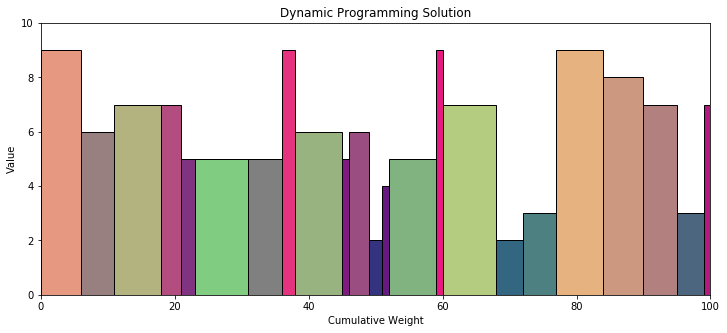

In [52]:
f = plt.figure(figsize=(12,5))
ax = f.add_subplot(111)
draw_knapsack(t,ax)
plt.xlabel("Cumulative Weight")
plt.ylabel("Value")
plt.title("Dynamic Programming Solution")
plt.savefig("DP Knapsack Solution")


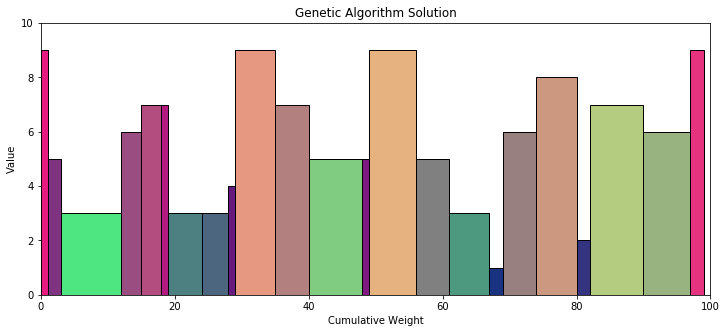

In [53]:
f = plt.figure(figsize=(12,5))
ax = f.add_subplot(111)
draw_knapsack(bog[-1],ax)
plt.xlabel("Cumulative Weight")
plt.ylabel("Value")
plt.title("Genetic Algorithm Solution")
plt.savefig("GA Knapsack Solution")

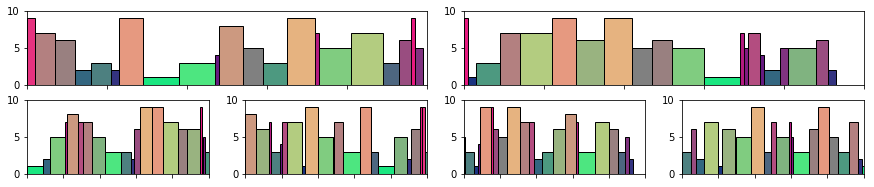

In [13]:
#Function to render matings into a family tree
#For a mating, show parents and offspring
#Row 1: Two parents
#Row 2: 4 Offspring
def drawMating(mating):
    plt.figure(figsize=(15,3))
    pax1 = plt.subplot2grid((2,4), (0,0), colspan=2)
    draw_knapsack(mating.parent_a,pax1)
    pax2 = plt.subplot2grid((2,4), (0,2), colspan=2)
    draw_knapsack(mating.parent_b,pax2)
    cax1 = plt.subplot2grid((2,4), (1,0))
    draw_knapsack(mating.children[0],cax1)
    cax2 = plt.subplot2grid((2,4), (1,1))
    draw_knapsack(mating.children[1],cax2)
    cax3 = plt.subplot2grid((2,4), (1,2))
    draw_knapsack(mating.children[2],cax3)
    cax4 = plt.subplot2grid((2,4), (1,3))
    draw_knapsack(mating.children[3],cax4)
    plt.setp(pax1.get_xticklabels(), visible=False)
    plt.setp(pax2.get_xticklabels(), visible=False)
    plt.setp(cax1.get_xticklabels(), visible=False)
    plt.setp(cax2.get_xticklabels(), visible=False)
    plt.setp(cax3.get_xticklabels(), visible=False)
    plt.setp(cax4.get_xticklabels(), visible=False)
    
drawMating(matings[0][0])


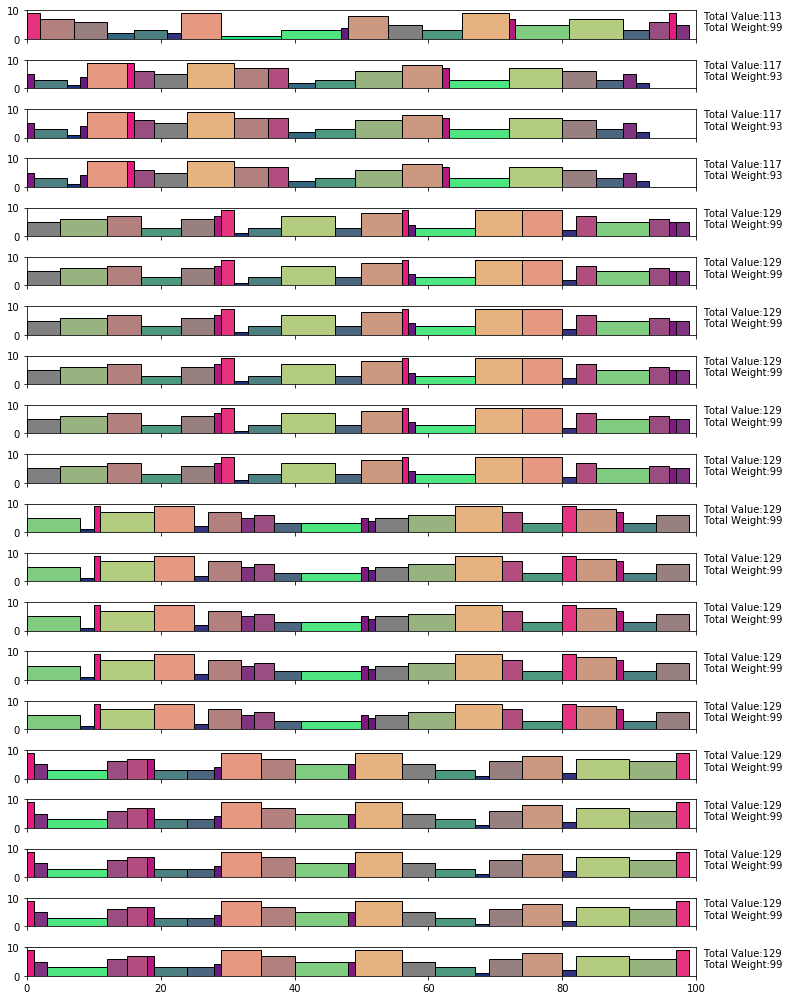

In [14]:
def draw_population(bog):
    f = plt.figure(figsize=(10,14))
    nbg = len(bog)
    for n,i in enumerate(bog):
    
        ax = f.add_subplot(nbg,1,n+1)
        draw_knapsack(i,ax)
        ax.text(101,7,"Total Value:{}".format(i.total_value()))
        ax.text(101,3,"Total Weight:{}".format(i.total_weight()))
        if n < nbg -1:
            plt.setp(ax.get_xticklabels(), visible=False)
    f.tight_layout()
    
draw_population(bog)
plt.savefig("KnapsackGenerations")

In [15]:
x = bog[0]

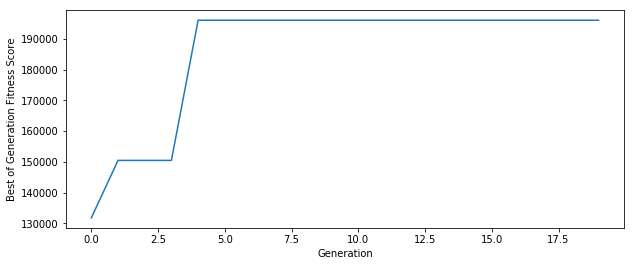

In [16]:
plt.figure(figsize=(10,4))
plt.plot([x.fitness_score() for x in bog])
plt.xlabel("Generation")
plt.ylabel("Best of Generation Fitness Score")
plt.savefig("knapsack.jpg")

In [17]:
def bla(x,y):
    return x**2 - 50*x + y**2

def rosenbrok(x,y):
    return (1 - x)**2 + 100 * (y -x **2)**2
    

In [18]:
xs = []
ys = []
zs = []
for x in np.arange(-5,5,0.05):
    for y in np.arange(-5,5,0.05):
        xs.append(x)
        ys.append(y)
        zs.append(rosenbrok(x,y))

s = .05
X = np.arange(-2, 2.+s, s)
Y = np.arange(-1, 3.+s, s)
X, Y = np.meshgrid(X, Y)
Z = (1.-X)**2 + 100.*(Y-X*X)**2

In [19]:
from matplotlib import animation
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

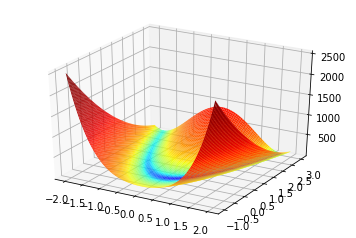

In [22]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, rstride = 1, cstride = 1, norm = LogNorm(), cmap = cm.jet, linewidth=0, edgecolor='none')

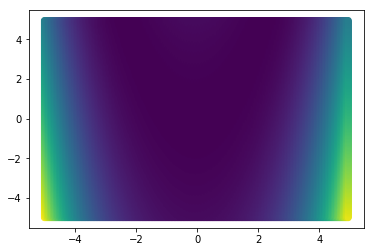

In [23]:
plt.scatter(xs,ys,c=zs)

In [24]:
from src.FunctionOptimizerIndividual import FunctionMinimizer2DIndividual
from src.Evolution import evolve_numeric_optimizer_population

In [25]:
f2di = [FunctionMinimizer2DIndividual(rosenbrok,np.random.randint(-1.5,-0.5),np.random.randint(-2.5,-1.5)) for x in range(10)]
# f2di = f2di + [FunctionMinimizer2DIndividual(rosenbrok,np.random.randint(-7,-6),np.random.randint(-7,-6)) for x in range(10)]

In [26]:
generations,xs,ys,fitness_scores,mean_fitness_scores,population,best_of_generations,population_record = evolve_numeric_optimizer_population(f2di,0.2,4,300,0.05)

Generation 0
Generation 1
Generation 2
Generation 3
Generation 4
Generation 5
Generation 6
Generation 7
Generation 8
Generation 9
Generation 10
Generation 11
Generation 12
Generation 13
Generation 14
Generation 15
Generation 16
Generation 17
Generation 18
Generation 19
Generation 20
Generation 21
Generation 22
Generation 23
Generation 24
Generation 25
Generation 26
Generation 27
Generation 28
Generation 29
Generation 30
Generation 31
Generation 32
Generation 33
Generation 34
Generation 35
Generation 36
Generation 37
Generation 38
Generation 39
Generation 40
Generation 41
Generation 42
Generation 43
Generation 44
Generation 45
Generation 46
Generation 47
Generation 48
Generation 49
Generation 50
Generation 51
Generation 52
Generation 53
Generation 54
Generation 55
Generation 56
Generation 57
Generation 58
Generation 59
Generation 60
Generation 61
Generation 62
Generation 63
Generation 64
Generation 65
Generation 66
Generation 67
Generation 68
Generation 69
Generation 70
Generation 71
Ge

C:\Users\james\Documents\GA\GeneticKnapsack\GeneticAlgorithms\src\Evolution.py:44: RuntimeWarning: invalid value encountered in long_scalars
  probabilities = [x.fitness_score()/total_fitness for x in population]
C:\Users\james\Documents\GA\GeneticKnapsack\GeneticAlgorithms\src\Evolution.py:46: RuntimeWarning: invalid value encountered in less
  partner_a = np.random.choice(population,size=1,p=probabilities)[0]
C:\Users\james\Documents\GA\GeneticKnapsack\GeneticAlgorithms\src\Evolution.py:47: RuntimeWarning: invalid value encountered in less
  partner_b = np.random.choice(population,size=1,p=probabilities)[0]



Generation 129
Generation 130
Generation 131
Generation 132
Generation 133
Generation 134
Generation 135
Generation 136
Generation 137
Generation 138
Generation 139
Generation 140
Generation 141
Generation 142
Generation 143
Generation 144
Generation 145
Generation 146
Generation 147
Generation 148
Generation 149
Generation 150
Generation 151
Generation 152
Generation 153
Generation 154
Generation 155
Generation 156
Generation 157
Generation 158
Generation 159
Generation 160
Generation 161
Generation 162
Generation 163
Generation 164
Generation 165
Generation 166
Generation 167
Generation 168
Generation 169
Generation 170
Generation 171
Generation 172
Generation 173
Generation 174
Generation 175
Generation 176
Generation 177
Generation 178
Generation 179
Generation 180
Generation 181
Generation 182
Generation 183
Generation 184
Generation 185
Generation 186
Generation 187
Generation 188
Generation 189
Generation 190
Generation 191
Generation 192
Generation 193
Generation 194
Generatio

In [27]:
movements = [(np.mean([i.x for i in b]),np.mean([i.y for i in b]),np.mean([i.z for i in b])) for b in population_record]

xss = [i[0] for i in movements]
yss = [i[1] for i in movements]
zss = [i[2] for i in movements]

In [28]:
X = np.arange(-2, 2.+s, s)
Y = np.arange(-3, 1.5+s, s)
X, Y = np.meshgrid(X, Y)
Z = (1.-X)**2 + 100.*(Y-X*X)**2

X2 = np.arange(-2, 2.+s, s)
Y2 = np.arange(-5, 1.5+s, s)
X2, Y2 = np.meshgrid(X2, Y2)
Z2 = (1.-X2)**2 + 100.*(Y2-X2*X2)**2

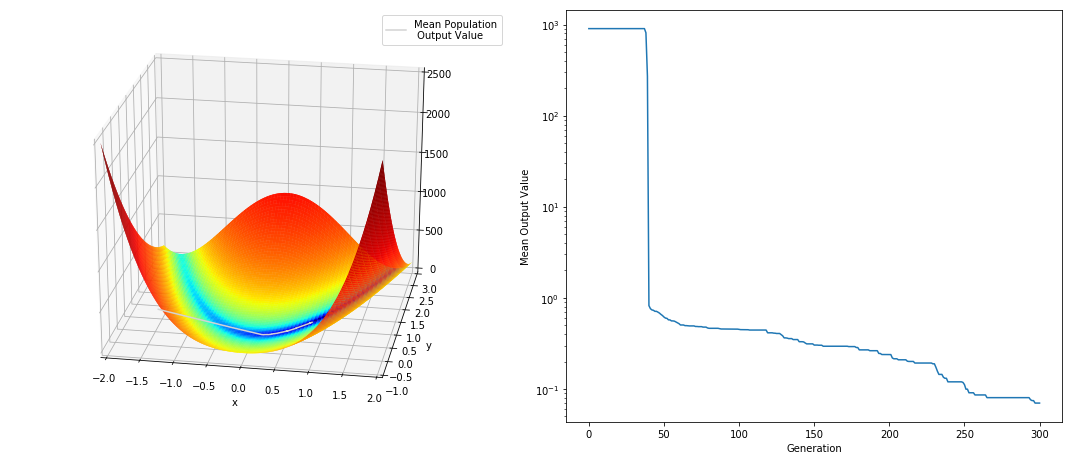

In [30]:
fig = plt.figure(figsize=(15,6.5))

ax = fig.add_subplot(121, projection='3d', azim = -80, elev = 25)
s = .05
X = np.arange(-2, 2.+s, s)
Y = np.arange(-1, 3.+s, s)
X, Y = np.meshgrid(X, Y)
Z = (1.-X)**2 + 100.*(Y-X*X)**2
ax.plot_surface(X, Y, Z, rstride = 1, cstride = 1, norm = LogNorm(), cmap = cm.jet)
# Without using `` linewidth=0, edgecolor='none' '', the code may produce a graph with wide black edges, which 
# will make the surface look much darker than the one illustrated in the figure above.
ax.plot_surface(X, Y, Z, rstride = 1, cstride = 1, norm = LogNorm(), cmap = cm.jet, linewidth=0, edgecolor='none')
# Set the axis limits so that they are the same as in the figure above.
ax.set_xlim([-2, 2.0])                                                       
ax.set_ylim([-1, 3.0])                                                       
ax.set_zlim([0, 2500]) 
plt.xlabel("x")
plt.ylabel("y")
ax.plot(xss,yss,zss,c="lightgrey",label="Mean Population\n Output Value")
plt.legend()
plt.subplot(122)
plt.semilogy(zss)
plt.xlabel("Generation")
plt.ylabel("Mean Output Value")
plt.tight_layout()
plt.savefig('rosenbrock.jpg')

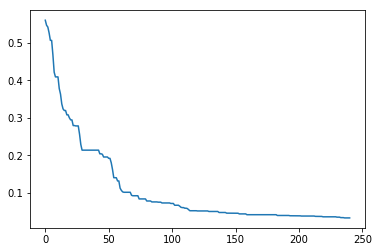

In [152]:
plt.plot(zss[60:])

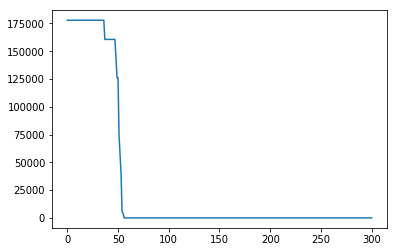

In [59]:
plt.plot(zss)

In [22]:
[x.fitness_score()/total_fitness for x in f2di]

[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.44677137870855149,
 0.0,
 0.0,
 0.0,
 0.31588132635253052,
 0.0,
 0.0,
 0.0,
 0.23734729493891799]

In [83]:
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import axes3d
import os, sys
import numpy as np
 
 
##### TO CREATE A SERIES OF PICTURES
 
def make_views(ax,angles,elevation=None, width=4, height = 3,
                prefix='tmprot_',**kwargs):
    """
    Makes jpeg pictures of the given 3d ax, with different angles.
    Args:
        ax (3D axis): te ax
        angles (list): the list of angles (in degree) under which to
                       take the picture.
        width,height (float): size, in inches, of the output images.
        prefix (str): prefix for the files created. 
     
    Returns: the list of files created (for later removal)
    """
     
    files = []
    ax.figure.set_size_inches(width,height)
     
    for i,angle in enumerate(angles):
     
        ax.view_init(elev = elevation, azim=angle)
        fname = '%s%03d.jpeg'%(prefix,i)
        ax.figure.savefig(fname)
        files.append(fname)
     
    return files
 
 
 
##### TO TRANSFORM THE SERIES OF PICTURE INTO AN ANIMATION
 
def make_movie(files,output, fps=10,bitrate=1800,**kwargs):
    """
    Uses mencoder, produces a .mp4/.ogv/... movie from a list of
    picture files.
    """
     
    output_name, output_ext = os.path.splitext(output)
    command = { '.mp4' : 'mencoder "mf://%s" -mf fps=%d -o %s.mp4 -ovc lavc\
                         -lavcopts vcodec=msmpeg4v2:vbitrate=%d'
                         %(",".join(files),fps,output_name,bitrate)}
                          
    command['.ogv'] = command['.mp4'] + '; ffmpeg -i %s.mp4 -r %d %s'%(output_name,fps,output)
     
    print(command[output_ext])
    output_ext = os.path.splitext(output)[1]
    os.system(command[output_ext])
 
 
 
def make_gif(files,output,delay=100, repeat=True,**kwargs):
    """
    Uses imageMagick to produce an animated .gif from a list of
    picture files.
    """
     
    loop = -1 if repeat else 0
    os.system('convert -delay %d -loop %d %s %s'
              %(delay,loop," ".join(files),output))
 
 
 
 
def make_strip(files,output,**kwargs):
    """
    Uses imageMagick to produce a .jpeg strip from a list of
    picture files.
    """
     
    os.system('montage -tile 1x -geometry +0+0 %s %s'%(" ".join(files),output))
     
     
     
##### MAIN FUNCTION
 
def rotanimate(ax, angles, output, **kwargs):
    """
    Produces an animation (.mp4,.ogv,.gif,.jpeg,.png) from a 3D plot on
    a 3D ax
     
    Args:
        ax (3D axis): the ax containing the plot of interest
        angles (list): the list of angles (in degree) under which to
                       show the plot.
        output : name of the output file. The extension determines the
                 kind of animation used.
        **kwargs:
            - width : in inches
            - heigth: in inches
            - framerate : frames per second
            - delay : delay between frames in milliseconds
            - repeat : True or False (.gif only)
    """
         
    output_ext = os.path.splitext(output)[1]
 
    files = make_views(ax,angles, **kwargs)
     
    D = { '.mp4' : make_movie,
          '.ogv' : make_movie,
          '.gif': make_gif ,
          '.jpeg': make_strip,
          '.png':make_strip}
           
    D[output_ext](files,output,**kwargs)
     
    

Text(0.5,0,'y')

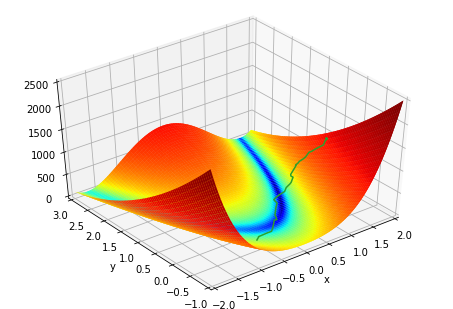

In [105]:


fig = plt.figure()
ax = Axes3D(fig, azim = -128, elev = 43)
s = .05
X = np.arange(-2, 2.+s, s)
Y = np.arange(-1, 3.+s, s)
X, Y = np.meshgrid(X, Y)
Z = (1.-X)**2 + 100.*(Y-X*X)**2
ax.plot_surface(X, Y, Z, rstride = 1, cstride = 1, norm = LogNorm(), cmap = cm.jet)
# Without using `` linewidth=0, edgecolor='none' '', the code may produce a graph with wide black edges, which 
# will make the surface look much darker than the one illustrated in the figure above.
ax.plot_surface(X, Y, Z, rstride = 1, cstride = 1, norm = LogNorm(), cmap = cm.jet, linewidth=0, edgecolor='none')
ax.plot(xss,yss,zss)
# Set the axis limits so that they are the same as in the figure above.
ax.set_xlim([-2, 2.0])                                                       
ax.set_ylim([-1, 3.0])                                                       
ax.set_zlim([0, 2500]) 

plt.xlabel("x")
plt.ylabel("y")

Formally, given a list of items with weights $w_k$, and values $v_k$, for $k = 1,2,...,N$ and the maximum weight $q$, then find 
$$\underset{v,w}{\operatorname{argmax}} (\sum_{k=0}^N)v_kx_k)$$ subject to $$\sum_{k=0}^N)v_kx_k) \leq q$$ where $x_1,x_2,...,x_n$ are binary encoded decision values indicating whether 0 or 1 of item $k$ were selected.

In [46]:
def himmelblau(x,y):
    return (x**2 + y - 11)**2 + (x+y**2-7)**2
f2di = [FunctionMinimizer2DIndividual(himmelblau,np.random.randint(-5,5),np.random.randint(-5,5)) for x in range(1000)]


In [48]:
generations,xs,ys,fitness_scores,mean_fitness_scores,population,best_of_generations,population_record = evolve_numeric_optimizer_population(f2di,0.2,5,100,0.1)

Generation 0
Generation 1
Generation 2
Generation 3
Generation 4
Generation 5
Generation 6
Generation 7
Generation 8
Generation 9
Generation 10
Generation 11
Generation 12
Generation 13
Generation 14
Generation 15
Generation 16
Generation 17
Generation 18
Generation 19
Generation 20
Generation 21
Generation 22
Generation 23
Generation 24
Generation 25
Generation 26
Generation 27
Generation 28
Generation 29
Generation 30
Generation 31
Generation 32
Generation 33
Generation 34
Generation 35
Generation 36
Generation 37
Generation 38
Generation 39
Generation 40
Generation 41
Generation 42
Generation 43
Generation 44
Generation 45
Generation 46
Generation 47
Generation 48
Generation 49
Generation 50
Generation 51
Generation 52
Generation 53
Generation 54
Generation 55
Generation 56
Generation 57
Generation 58
Generation 59
Generation 60
Generation 61
Generation 62
Generation 63
Generation 64
Generation 65
Generation 66
Generation 67
Generation 68
Generation 69
Generation 70
Generation 71
Ge

In [49]:
movements = [(np.mean([i.x for i in b]),np.mean([i.y for i in b]),np.mean([i.z for i in b])) for b in population_record]

xss = [i[0] for i in movements]
yss = [i[1] for i in movements]
zss = [i[2] for i in movements]

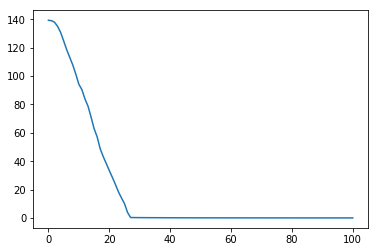

In [50]:
plt.plot(zss)

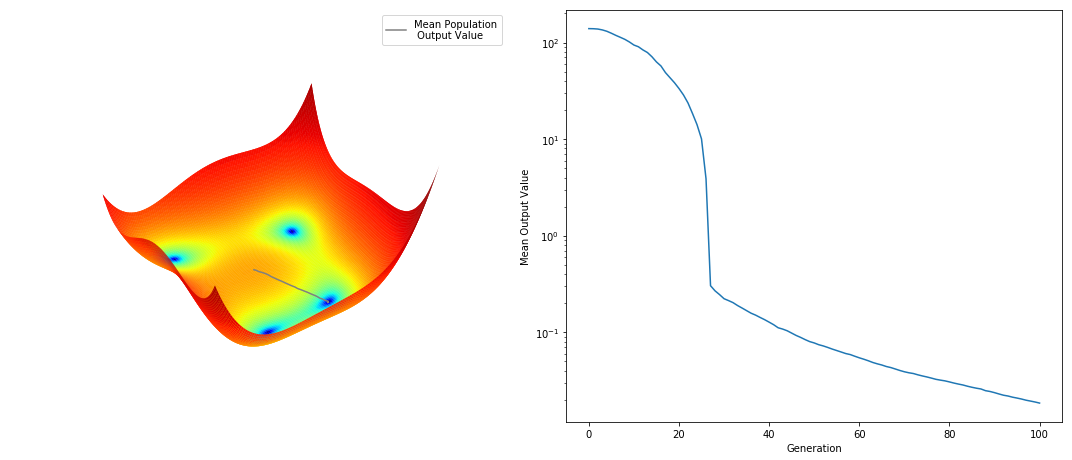

In [51]:
fig = plt.figure(figsize=(15,6.5))
ax = fig.add_subplot(121, projection='3d', azim = -29, elev = 49)
s = .1
X = np.arange(-6, 6.+s, s)
Y = np.arange(-6, 6.+s, s)
X, Y = np.meshgrid(X, Y)
Z = (X**2 + Y - 11)**2 + (X+Y**2-7)**2
ax.plot_surface(X, Y, Z, rstride = 1, cstride = 1, norm = LogNorm(), cmap = cm.jet)
# Without using `` linewidth=0, edgecolor='none' '', the code may produce a graph with wide black edges, which 
# will make the surface look much darker than the one illustrated in the figure above.
ax.plot_surface(X, Y, Z, rstride = 1, cstride = 1, norm = LogNorm(), cmap = cm.jet, linewidth=0, edgecolor='none')
# Set the axis limits so that they are the same as in the figure above.

plt.axis('off')
plt.xlabel("x")
plt.ylabel("y")
ax.plot(xss,yss,zss,c="grey",label="Mean Population\n Output Value")
plt.legend()
plt.subplot(122)
plt.semilogy(zss)

plt.xlabel("Generation")
plt.ylabel("Mean Output Value")
plt.tight_layout()
plt.savefig('himmelblau.jpg')